# Chapter 6: Introduction to Fractals
*Based on J. Harrison*

## Summary

Fractals are sets with non-integer (fractal) dimension, often arising from self-similar constructions. Key concepts:

- **Self-similarity**: A set that looks the same at all scales
- **Fractal dimension**: Measures complexity/space-filling properties
- **Box-counting dimension**: Practical method to estimate dimension
- **Classic fractals**: Cantor set, Sierpiński triangle, Koch curve
- **Hausdorff dimension**: Rigorous mathematical definition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
%matplotlib inline
plt.style.use('dark_background')

## 6.1 The Cantor Set

Remove the middle third repeatedly. Dimension: $\log(2)/\log(3) \approx 0.631$

In [2]:
def cantor_set(n_iter):
    """Draw the Cantor set construction"""
    fig, ax = plt.subplots(figsize=(14, 8))
    
    def draw_cantor(level, x_start, x_end, y):
        if level > n_iter:
            return
        
        ax.plot([x_start, x_end], [y, y], 'cyan', lw=8)
        
        length = (x_end - x_start) / 3
        draw_cantor(level + 1, x_start, x_start + length, y - 0.12)
        draw_cantor(level + 1, x_end - length, x_end, y - 0.12)
    
    draw_cantor(0, 0, 1, 1)
    
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.1 - 0.12 * n_iter, 1.1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Cantor Set Construction (n = {n_iter})\nDimension ≈ {np.log(2)/np.log(3):.3f}')
    plt.show()

interact(cantor_set, n_iter=IntSlider(min=0, max=8, step=1, value=5, description='Iterations'));

interactive(children=(IntSlider(value=5, description='Iterations', max=8), Output()), _dom_classes=('widget-in…

## 6.2 Sierpiński Triangle

Remove central triangles repeatedly. Dimension: $\log(3)/\log(2) \approx 1.585$

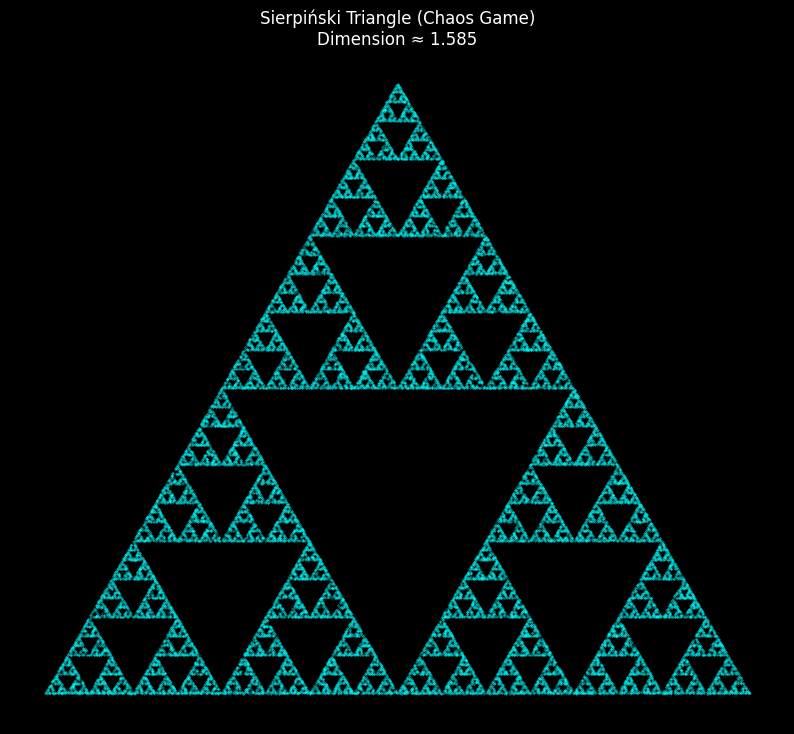

In [3]:
def sierpinski_triangle(n_iter):
    """Draw Sierpiński triangle using chaos game"""
    # Vertices of equilateral triangle
    vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
    
    # Chaos game
    n_points = 50000
    points = np.zeros((n_points, 2))
    points[0] = [0.5, 0.25]  # Starting point
    
    for i in range(1, n_points):
        v = vertices[np.random.randint(3)]
        points[i] = (points[i-1] + v) / 2
    
    fig, ax = plt.subplots(figsize=(10, 9))
    ax.scatter(points[100:, 0], points[100:, 1], s=0.1, c='cyan', alpha=0.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Sierpiński Triangle (Chaos Game)\nDimension ≈ {np.log(3)/np.log(2):.3f}')
    plt.show()

sierpinski_triangle(6)

In [4]:
def sierpinski_recursive(n_iter):
    """Draw Sierpiński triangle using recursive subdivision"""
    fig, ax = plt.subplots(figsize=(10, 9))
    
    def draw_triangle(v1, v2, v3, level):
        if level == 0:
            triangle = plt.Polygon([v1, v2, v3], facecolor='cyan', edgecolor='none')
            ax.add_patch(triangle)
        else:
            # Midpoints
            m1 = (v1 + v2) / 2
            m2 = (v2 + v3) / 2
            m3 = (v1 + v3) / 2
            # Recurse on three corner triangles
            draw_triangle(v1, m1, m3, level - 1)
            draw_triangle(m1, v2, m2, level - 1)
            draw_triangle(m3, m2, v3, level - 1)
    
    vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
    draw_triangle(vertices[0], vertices[1], vertices[2], n_iter)
    
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.0)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Sierpiński Triangle (Recursive, n = {n_iter})')
    plt.show()

interact(sierpinski_recursive, n_iter=IntSlider(min=0, max=8, step=1, value=5, description='Iterations'));

interactive(children=(IntSlider(value=5, description='Iterations', max=8), Output()), _dom_classes=('widget-in…

## 6.3 Koch Curve

Replace each segment with a bent segment. Dimension: $\log(4)/\log(3) \approx 1.262$

In [5]:
def koch_curve(n_iter):
    """Draw the Koch curve"""
    def koch_segment(p1, p2, level):
        if level == 0:
            return [p1, p2]
        
        # Divide segment into thirds
        d = (p2 - p1) / 3
        a = p1
        b = p1 + d
        # Peak of triangle (rotate 60 degrees)
        c = b + np.array([d[0]*np.cos(np.pi/3) - d[1]*np.sin(np.pi/3),
                         d[0]*np.sin(np.pi/3) + d[1]*np.cos(np.pi/3)])
        d_pt = p1 + 2*d
        e = p2
        
        # Recurse
        points = []
        for seg in [(a, b), (b, c), (c, d_pt), (d_pt, e)]:
            points.extend(koch_segment(seg[0], seg[1], level - 1)[:-1])
        points.append(e)
        return points
    
    fig, ax = plt.subplots(figsize=(14, 5))
    
    points = koch_segment(np.array([0.0, 0.0]), np.array([1.0, 0.0]), n_iter)
    points = np.array(points)
    
    ax.plot(points[:, 0], points[:, 1], 'cyan', lw=0.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Koch Curve (n = {n_iter})\nDimension ≈ {np.log(4)/np.log(3):.3f}')
    plt.show()

interact(koch_curve, n_iter=IntSlider(min=0, max=7, step=1, value=4, description='Iterations'));

interactive(children=(IntSlider(value=4, description='Iterations', max=7), Output()), _dom_classes=('widget-in…

## 6.4 Koch Snowflake

Three Koch curves forming a closed shape. Finite area, infinite perimeter.

In [6]:
def koch_snowflake(n_iter):
    """Draw the Koch snowflake"""
    def koch_segment(p1, p2, level):
        if level == 0:
            return [p1]
        
        d = (p2 - p1) / 3
        a = p1
        b = p1 + d
        c = b + np.array([d[0]*np.cos(np.pi/3) - d[1]*np.sin(np.pi/3),
                         d[0]*np.sin(np.pi/3) + d[1]*np.cos(np.pi/3)])
        d_pt = p1 + 2*d
        
        points = []
        for seg in [(a, b), (b, c), (c, d_pt), (d_pt, p2)]:
            points.extend(koch_segment(seg[0], seg[1], level - 1))
        return points
    
    # Equilateral triangle vertices
    h = np.sqrt(3) / 2
    v1 = np.array([0.5, h/3 + h])
    v2 = np.array([0.0, h/3])
    v3 = np.array([1.0, h/3])
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    points = []
    points.extend(koch_segment(v1, v2, n_iter))
    points.extend(koch_segment(v2, v3, n_iter))
    points.extend(koch_segment(v3, v1, n_iter))
    points.append(v1)
    points = np.array(points)
    
    ax.fill(points[:, 0], points[:, 1], facecolor='cyan', edgecolor='white', lw=0.3)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Koch Snowflake (n = {n_iter})')
    plt.show()

interact(koch_snowflake, n_iter=IntSlider(min=0, max=6, step=1, value=4, description='Iterations'));

interactive(children=(IntSlider(value=4, description='Iterations', max=6), Output()), _dom_classes=('widget-in…

## 6.5 Box-Counting Dimension

Estimate fractal dimension by counting boxes of decreasing size.

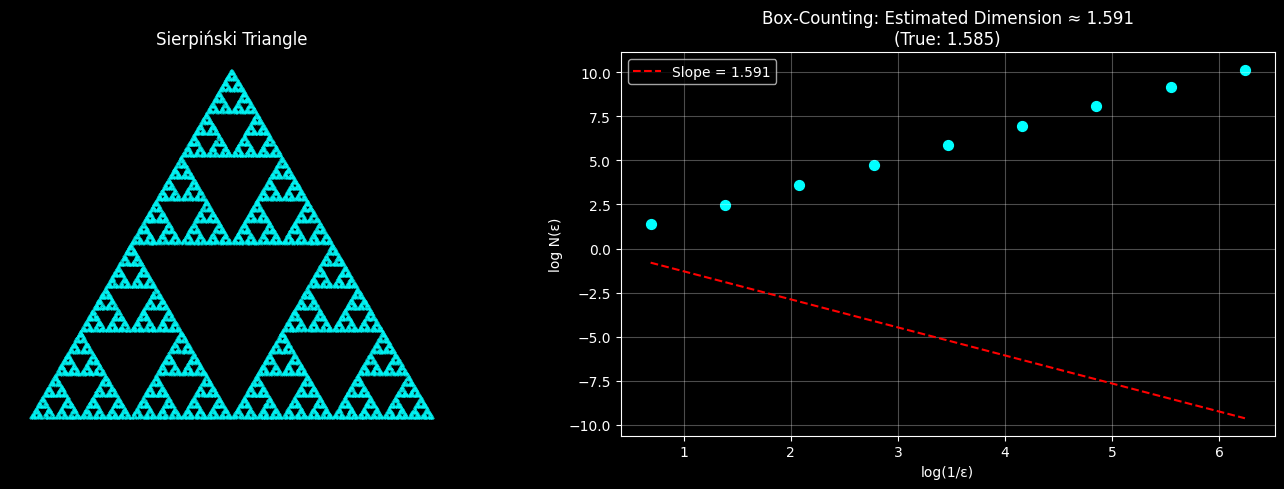

In [7]:
def box_counting_demo():
    """Demonstrate box-counting dimension estimation"""
    # Generate Sierpiński triangle points
    vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
    n_points = 100000
    points = np.zeros((n_points, 2))
    points[0] = [0.5, 0.25]
    for i in range(1, n_points):
        v = vertices[np.random.randint(3)]
        points[i] = (points[i-1] + v) / 2
    points = points[1000:]  # Skip transient
    
    # Box counting at different scales
    box_sizes = [1/2**k for k in range(1, 10)]
    counts = []
    
    for size in box_sizes:
        # Count occupied boxes
        grid_x = (points[:, 0] / size).astype(int)
        grid_y = (points[:, 1] / size).astype(int)
        occupied = set(zip(grid_x, grid_y))
        counts.append(len(occupied))
    
    # Fit line to log-log plot
    log_sizes = np.log(box_sizes)
    log_counts = np.log(counts)
    slope, intercept = np.polyfit(log_sizes, log_counts, 1)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Fractal
    axes[0].scatter(points[:, 0], points[:, 1], s=0.1, c='cyan', alpha=0.3)
    axes[0].set_aspect('equal')
    axes[0].set_title('Sierpiński Triangle')
    axes[0].axis('off')
    
    # Log-log plot
    axes[1].scatter(-log_sizes, log_counts, c='cyan', s=50)
    axes[1].plot(-log_sizes, -slope * log_sizes + intercept, 'r--', 
                 label=f'Slope = {-slope:.3f}')
    axes[1].set_xlabel('log(1/ε)')
    axes[1].set_ylabel('log N(ε)')
    axes[1].set_title(f'Box-Counting: Estimated Dimension ≈ {-slope:.3f}\n(True: {np.log(3)/np.log(2):.3f})')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

box_counting_demo()

## Notes

- **Self-similarity dimension**: For a set made of $N$ copies scaled by factor $r$: $D = \log(N)/\log(1/r)$
- **Space-filling curves**: Dimension can equal 2 (Hilbert curve, Peano curve)
- **Measure and dimension**: Sets with dimension $< n$ have zero $n$-dimensional measure
- **Natural fractals**: Coastlines, mountains, clouds exhibit statistical self-similarity